In [171]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define the file name containing Chinese characters
# file_name = '20230321_sensor1_标定正弦30Hz_15点43mVrms'

# timeDelay = 4 # ms

# # Read the file and extract the data columns
# data = np.loadtxt(file_name)
# col1 = data[:, 0]
# col2 = data[:, 1]

# MeasureNum = 1500

# cropCol1 = col1[(1000+timeDelay):(MeasureNum+timeDelay)]  # Measure
# cropCol2 = col2[1000:MeasureNum]  # Input

# BInput = cropCol2 * 1000 #* 4.608 # V --> mV --> pT , mV
# yMeasure = cropCol1 * 1000 # V --> mV
# yMeasureCurrent = col1[1000:MeasureNum] * 1000


# # Plot the input data
# plt.figure()
# plt.plot(cropCol2, linewidth=2, color='red', label='Input Data')
# plt.title('Input Data')
# plt.ylabel('Voltage (V)')
# plt.legend(loc='lower right')
# plt.show()

# # Plot the measured data
# plt.figure()
# plt.style.use('seaborn-whitegrid')
# plt.plot(cropCol1, linewidth=2, color='blue', label='Measured Data')
# plt.title('Measured Data')
# plt.xlabel('Column 1')
# plt.ylabel('Voltage (V)')
# plt.legend(loc='lower right')
# plt.show()

# # Define the scaling factor and phase shift for the reference curve
# # Kscale = 5.82 * 1e7
# # Phi = 0.0

# # # Define the state transition matrix
# # A = np.array([[0.]])

# # # Define the control input matrix
# # B = np.array([[0.0064]])

# # # Define the measurement matrix
# # D = np.array([[Kscale]])

# # # Define the process noise covariance matrix
# # Q = np.array([[0.05]])

# # # Define the measurement noise covariance matrix
# # R = np.array([[3]])

# # # Initialize the state vector
# # x = np.array([[0.]])

# # # Initialize the state covariance matrix
# # P = np.array([[1]])

# # # Define the constant term matrices
# # C = np.array([[0.0]])
# # E = np.array([[Phi]])
# # zPred = []
# # Run the Kalman filter
# # for i in range(len(BInput)):
# #     u = np.asarray([BInput[i]])
# #     z = np.asarray([yMeasure[i]])
# #     # Predict the next state estimate and covariance
# #     x = A @ x + B @ u + C
# #     P = A @ P @ A.T + Q
    
# #     # Update the state estimate and covariance using the measurement
# #     K = P @ D.T @ np.linalg.inv(D @ P @ D.T + R)
# #     x = x + K @ (z - D @ x - E)
    
# #     zPred.append(D@x+E)
    
# #     P = (np.eye(1) - K @ D) @ P
    
    
    
    

# # plt.figure()
# # plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Reference', color='blue')
# # plt.plot(timeRange, zPred, markersize=5, linestyle='-', label='Prediction', alpha=0.5, color='red')
# # plt.xlabel('Time (s)')
# # plt.ylabel('Amplitude (pT)')
# # plt.title


In [172]:
# # -*- coding: utf-8 -*-
# """Copyright 2015 Roger R Labbe Jr.

# FilterPy library.
# http://github.com/rlabbe/filterpy

# Documentation at:
# https://filterpy.readthedocs.org

# Supporting book at:
# https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python

# This is licensed under an MIT license. See the readme.MD file
# for more information.
# """

# from __future__ import (absolute_import, division, print_function,
#                         unicode_literals)
# import numpy as np
# from numpy import random
# import matplotlib.pyplot as plt
# from filterpy.kalman import KalmanFilter


# DO_PLOT = False

# def test_rts():
#     fk = KalmanFilter(dim_x=2, dim_z=1)

#     fk.x = np.array([-1., 1.])    # initial state (location and velocity)

#     fk.F = np.array([[1.,1.],
#                      [0.,1.]])      # state transition matrix

#     fk.H = np.array([[1.,0.]])      # Measurement function
#     fk.P = .01                     # covariance matrix
#     fk.R = 5                       # state uncertainty
#     fk.Q = 0.001                   # process uncertainty


#     zs = [t + random.randn()*4 for t in range(40)]

#     mu, cov, _, _ = fk.batch_filter (zs)
#     mus = [x[0] for x in mu]

#     M, P, _, _ = fk.rts_smoother(mu, cov)

#     if DO_PLOT:
#         p1, = plt.plot(zs,'cyan', alpha=0.5)
#         p2, = plt.plot(M[:,0],c='b')
#         p3, = plt.plot(mus,c='r')
#         p4, = plt.plot([0, len(zs)], [0, len(zs)], 'g') # perfect result
#         plt.legend([p1, p2, p3, p4],
#                    ["measurement", "RKS", "KF output", "ideal"], loc=4)

#         plt.show()



# if __name__ == '__main__':
#     DO_PLOT = True
#     test_rts()

In [173]:
import numpy as np
import matplotlib.pyplot as plt
xTime = np.array([1/1000 * i for i in range(500)])
xData = 20*np.sin(2*np.pi*30*xTime)
# Add white noise with amplitude 0.1
noise_amplitude = 0.1
noise = noise_amplitude * np.random.normal(0, 1, len(xData))
xData_with_noise = xData + noise

yData = 9.28 * xData_with_noise


In [174]:
from filterpy.kalman import KalmanFilter
noise_us = noise_amplitude * np.random.normal(0, 1, len(xData))
dt = 1/1000   # time step 1 second

noise_2sd = noise_amplitude * dt
#zPred = np.asarray(zPred).reshape(-1)
zRef = yData
Kscale = 9.2843
# Plot the predicted and reference curves
#timeRange = np.array([1/1000 * i for i in range(len(BInput))])
timeRange = xTime
Q1 = 0
Q2 = 9.2845*1e-5

## dynamic noise
Qdynamic = 0.1*dt
inputNoise = np.random.randn(len(timeRange)) * np.sqrt(Qdynamic)


#Q2 = 11.2845*1e-5

GRpsn = 6.3246*1e-3
#GRpsn = 0.0286

tracker = KalmanFilter(dim_x=4, dim_z=1, dim_u=1)


tracker.F = np.array([[1, dt,0,0],[0,1,dt,0],[0,0,1,0],[9.2846*1e-2, 0,0,0]])

from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise

#q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
tracker.Q = np.array([[0, 0,0,0],[0, 0,0,0],[0, 0,Qdynamic,0],[0, 0,0,Q2**2]])
print(tracker.Q)
tracker.B = np.array([[0],[0],[0],[0]])

tracker.H = np.array([[0, 0,0, 1e2]])

tracker.R = np.array([[GRpsn**2]])

tracker.x = np.array([[0],[0],[0],[0]])
tracker.P = np.eye(4) * 1.
#tracker.P = 1
mu, cov, _, _ = tracker.batch_filter(yData, us = noise_us)

mu0 = mu[:,0,:].reshape(-1)
mu_2sd = mu[:,2,:].reshape(-1)
mu1 = mu[:,3,:].reshape(-1)
KF_estimate_In = mu0 
KF_estimate_Measure = mu1 * 1e2

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.62019402e-09]]


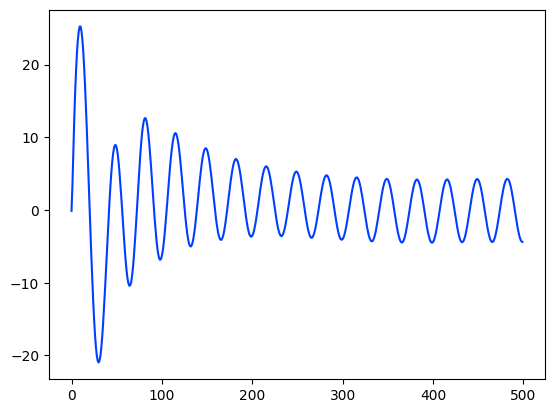

In [175]:
plt.plot(KF_estimate_In)

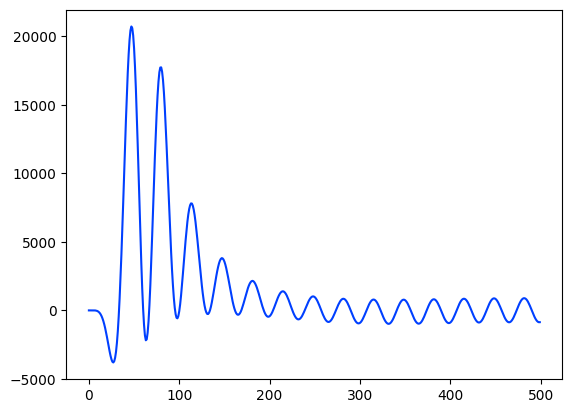

In [176]:
plt.plot(mu_2sd)

C:\Users\leisir\AppData\Local\Temp\ipykernel_4588\3325367879.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


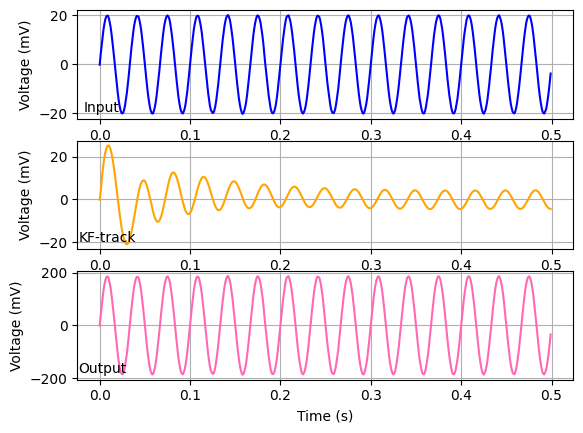

In [177]:
plt.style.use('seaborn-bright')

plt.subplot(3, 1, 1)
plt.plot(timeRange, xData_with_noise, color='blue')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.05, 0.1, 'Input', transform=plt.gca().transAxes, ha='center', va='center')

plt.subplot(3, 1, 2)
plt.plot(timeRange, KF_estimate_In, color='orange')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.06, 0.1, 'KF-track', transform=plt.gca().transAxes, ha='center', va='center')

plt.subplot(3, 1, 3)
plt.plot(timeRange, yData, color='#FF69B4')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.05, 0.1, 'Output', transform=plt.gca().transAxes, ha='center', va='center')

plt.savefig('KF_Tri_30Hz.png', dpi=300, bbox_inches='tight')


In [178]:
# plt.style.use('seaborn-bright')

# # plt.subplot(3, 1, 1)
# # plt.plot(timeRange, zRef)
# # plt.ylabel('Voltage (mV)')
# # plt.grid(True)

# plt.subplot(3, 1, 2)
# plt.plot(timeRange, KF_estimate_In)
# plt.ylabel('Voltage (mV)')
# plt.grid(True)

# plt.subplot(3, 1, 3)
# plt.plot(timeRange, yData)
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (mV)')
# plt.grid(True)


Text(0.5, 1.0, 'KF on the zRef curve')

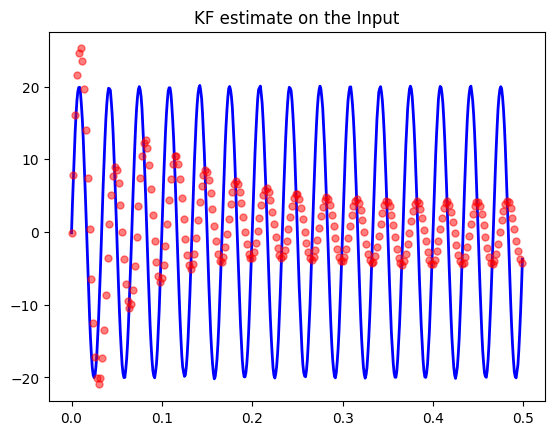

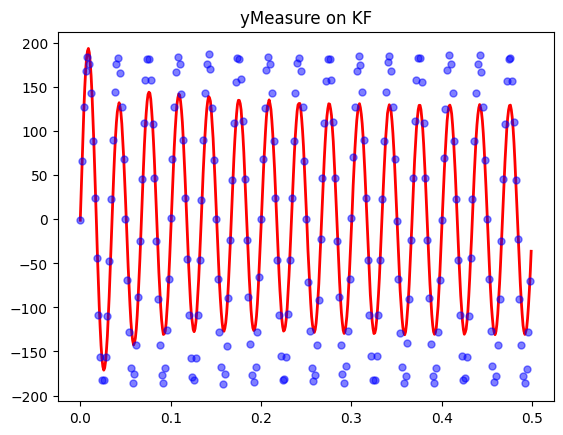

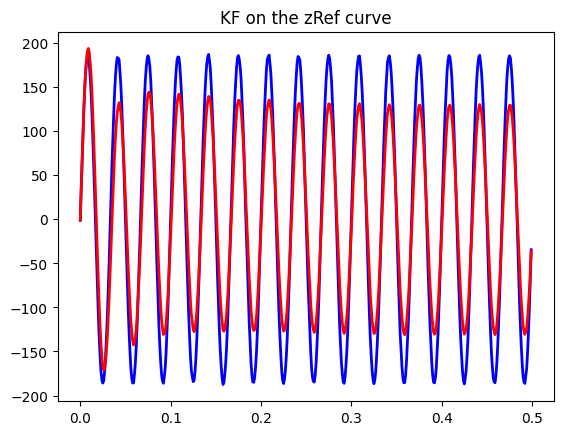

In [179]:
# plt.figure()
# plt.plot(timeRange, BInput, linestyle='-', linewidth=2, label='Ref', color='blue')
# plt.plot(timeRange[::2], KF_estimate_In[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
# plt.title('KF estimate on the Input curve')

plt.figure()
plt.plot(timeRange, xData_with_noise, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], KF_estimate_In[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('KF estimate on the Input')


# plt.figure()
# plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
# plt.plot(timeRange[::2], yData[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
# plt.title('yMeasure Future on the zRef curve')

plt.figure()
plt.plot(timeRange, KF_estimate_Measure, linestyle='-', linewidth=2, label='Ref', color='red')
plt.plot(timeRange[::2], yData[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='blue')
plt.title('yMeasure on KF')


plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
#plt.plot(timeRange[::2], KF_estimate_Measure[::2], '0', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.plot(timeRange, KF_estimate_Measure, linestyle='-', linewidth=2, label='KF', color='red')

plt.title('KF on the zRef curve')


In [180]:
# X1 = fft(BInput*9.2843)
# X2 = fft(yMeasure)

# # Find the cross-correlation of the two signals
# C = ifft(X1 * np.conj(X2))

# # Find the time delay (in seconds) corresponding to the peak of the cross-correlation
# delay = timeRange[np.argmax(C)]

# print('Delay KF s: ', delay)

In [181]:
# X1 = fft(zRef)
# X2 = fft(KF_estimate_Measure)

# # Find the cross-correlation of the two signals
# C = ifft(X1 * np.conj(X2))

# # Find the time delay (in seconds) corresponding to the peak of the cross-correlation
# delay = timeRange[np.argmax(C)]

# print('Delay KF s: ', delay)

# # Compute the phase difference between the two signals
# phase_diff = timeRange[peak_index] - timeRange[0]

# plt.plot(timeRange, corr, label='Cross-correlation')
# plt.axvline(timeRange[peak_index], color='r', linestyle='--', label='Peak')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Phase difference = {:.2f} radians'.format(phase_diff))
# plt.legend()
# plt.show()

In [182]:
# plt.figure()
# plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
# plt.plot(timeRange[::2], KF_estimate_Measure[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
# plt.title('KF estimate on the Ref curve')

In [183]:
# # 误差图绘制
# Bin_err = KF_estimate_Measure - zRef
# Measure_err = KF_estimate_Measure - yData
# Measure_err_Current = KF_estimate_Measure - yData

# plt.figure()
# plt.plot(Bin_err**2)
# plt.title('KF err on zRef')

# plt.figure()
# plt.plot(Measure_err**2)
# plt.title('KF err on yMeasure_Future')


# plt.figure()
# plt.plot(Measure_err_Current**2)
# plt.title('KF err on yMeasure_Current')

In [184]:
# plt.hist(Measure_err, bins=30)

In [185]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch

# print(timeRange.shape, yMeasure.shape)
# # Compute the power spectral density using Welch's method , nperseg=1024
# f, Pxx = welch(timeRange, yMeasure, nperseg=1024)

# # Plot the power spectral density
# plt.figure()
# plt.semilogy(f, Pxx)
# plt.xlabel('Frequency [Hz]')
# plt.ylabel('Power Spectral Density [V**2/Hz]')
# plt.title('PSD of a Sine-like Curve (Log scale)')
# plt.grid()
# plt.show()



In [186]:
# plt.hist(Bin_err, bins=30)

In [187]:
# # np.savetxt('yMeasure.txt', yMeasure)
# np.savetxt('KF_y.txt', KF_estimate_Measure)

In [188]:
# from scipy.spatial.distance import euclidean

# KF_distance = euclidean(KF_estimate_Measure, zRef)/len(timeRange)
# Measure_distance = euclidean(yMeasureCurrent, zRef)/len(timeRange)

# print("Euclidean distance between the KF curves:", KF_distance)
# print("Euclidean distance between the Measure curves:", Measure_distance)